# 텐서: 다차원 배열
* 텐서는 파이토치의 기본 자료구조
* 텐서는 일종의 배열 즉, 한 개나 여러 개의 인덱스를 사용해 개별적으로 값에 
* 접근할 수 있는 형태의숫자 모음을 저장하는 자료구조이다.

In [2]:
# 파이썬 리스트에서 파이토치 텐서로
a = [1.0,2.0,1.0]

a[0]

1.0

In [3]:
from torchvision import transforms
preprocess = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224), transforms.ToTensor(), transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])])

# 해당 코드는 입력 이미지의 크기를 256x256으로 조정하고, 중심으로부터 224x224로 잘라낸 후 파이토치 다차원 배열인 텐서 형태로 전환한다.
# 그리고 지정된 평균과 표준편차를 가지도록 RGB를 정규화한다.



from PIL import Image
img = Image.open("./bee.jpg")
img_t = preprocess(img)

import torch
batch_t = torch.unsqueeze(img_t, 0)


import torch
a = torch.ones(3) # 크기가 3인 1차원 텐서를 만들고 값을 1로 채우기

# 파이썬 리스트나 튜플 객체는 메모리가 따로따로 할당 
# 반면 텐서는 연속적인 메모리 할당

points = torch.zeros(3)
points[0]

tensor = torch.tensor([1.0,2.0,3.0,4.0,5.0])
tensor = torch.tensor([[4.0,1.0], [ 5.0,3.0], [ 2.0,1.0]])
tensor[None]

img_t = torch.rand(3,5,5) #각각이 [ 채널 크기, 행 크기, 열 크기]
weights = torch.tensor([0.2216,0.7152,0.07222])

batch_t = torch.rand(2,3,5,5) #[ 채널크기, 행 크기, 열 크기]

img_gray_naive = img_t.mean(-3)
batch_gray_naive = batch_t.mean(-3)
img_gray_naive.shape, batch_gray_naive.shape

unsqueezed_weights = weights.unsqueeze(-1).unsqueeze_(-1)
img_weights = (img_t * unsqueezed_weights)
batch_weights = (batch_t * unsqueezed_weights)
img_gray_weighted = img_weights.sum(-3)
batch_gray_weighted = batch_weights.sum(-3)
batch_weights.shape, batch_t.shape, unsqueezed_weights.shape





(torch.Size([2, 3, 5, 5]), torch.Size([2, 3, 5, 5]), torch.Size([3, 1, 1]))

In [4]:
img_gray_weighted_fancy = torch.einsum('...chw,c->...hw', img_t, weights)
batch_gray_weighted_fancy = torch.einsum('...chw,c->...hw', batch_t,weights)
batch_gray_weighted_fancy.shape

weights_named = torch.tensor([0.2126,0.7152,0.0722], names=['channels'])
weights_named

C:\Users\mcw1217\AppData\Local\Temp\ipykernel_14708\1839448935.py:5: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at C:\cb\pytorch_1000000000000\work\c10/core/TensorImpl.h:1761.)
  weights_named = torch.tensor([0.2126,0.7152,0.0722], names=['channels'])


tensor([0.2126, 0.7152, 0.0722], names=('channels',))

# 텐서 요소 타입
___

* 파이썬에서 숫자는 객체다
* 파이썬에서 리스트는 연속된 객체의 컬렉션이다
* 파이썬 인터프리터는 최적화를 거치는 컴파일된 코드보다 느리다.

## dtype으로 숫자 타입 지정
* torch.float32 ,torch.int64 등등

- 신경망 연산은 대부분 32비트 부동소수점 연산!!!
- [!] 64비트를 사용해봐야 정확도 개선X 와 더 많은 자원소비

ex) double_points = torch.ones(10, 2, dtype=torch.double)
    short_points = torch.tensor([[1,2],[3,4]], dtype=torch.short)
    
    속성확인
    short_points.dtype
    
   
 

In [5]:
a = torch.ones(3,2,5)
a_t = torch.transpose(a,0,1) #transpose는 두개의 차원만 교체가능 / premute는 모든 차원 가능

a.shape, a_t.shape

(torch.Size([3, 2, 5]), torch.Size([2, 3, 5]))

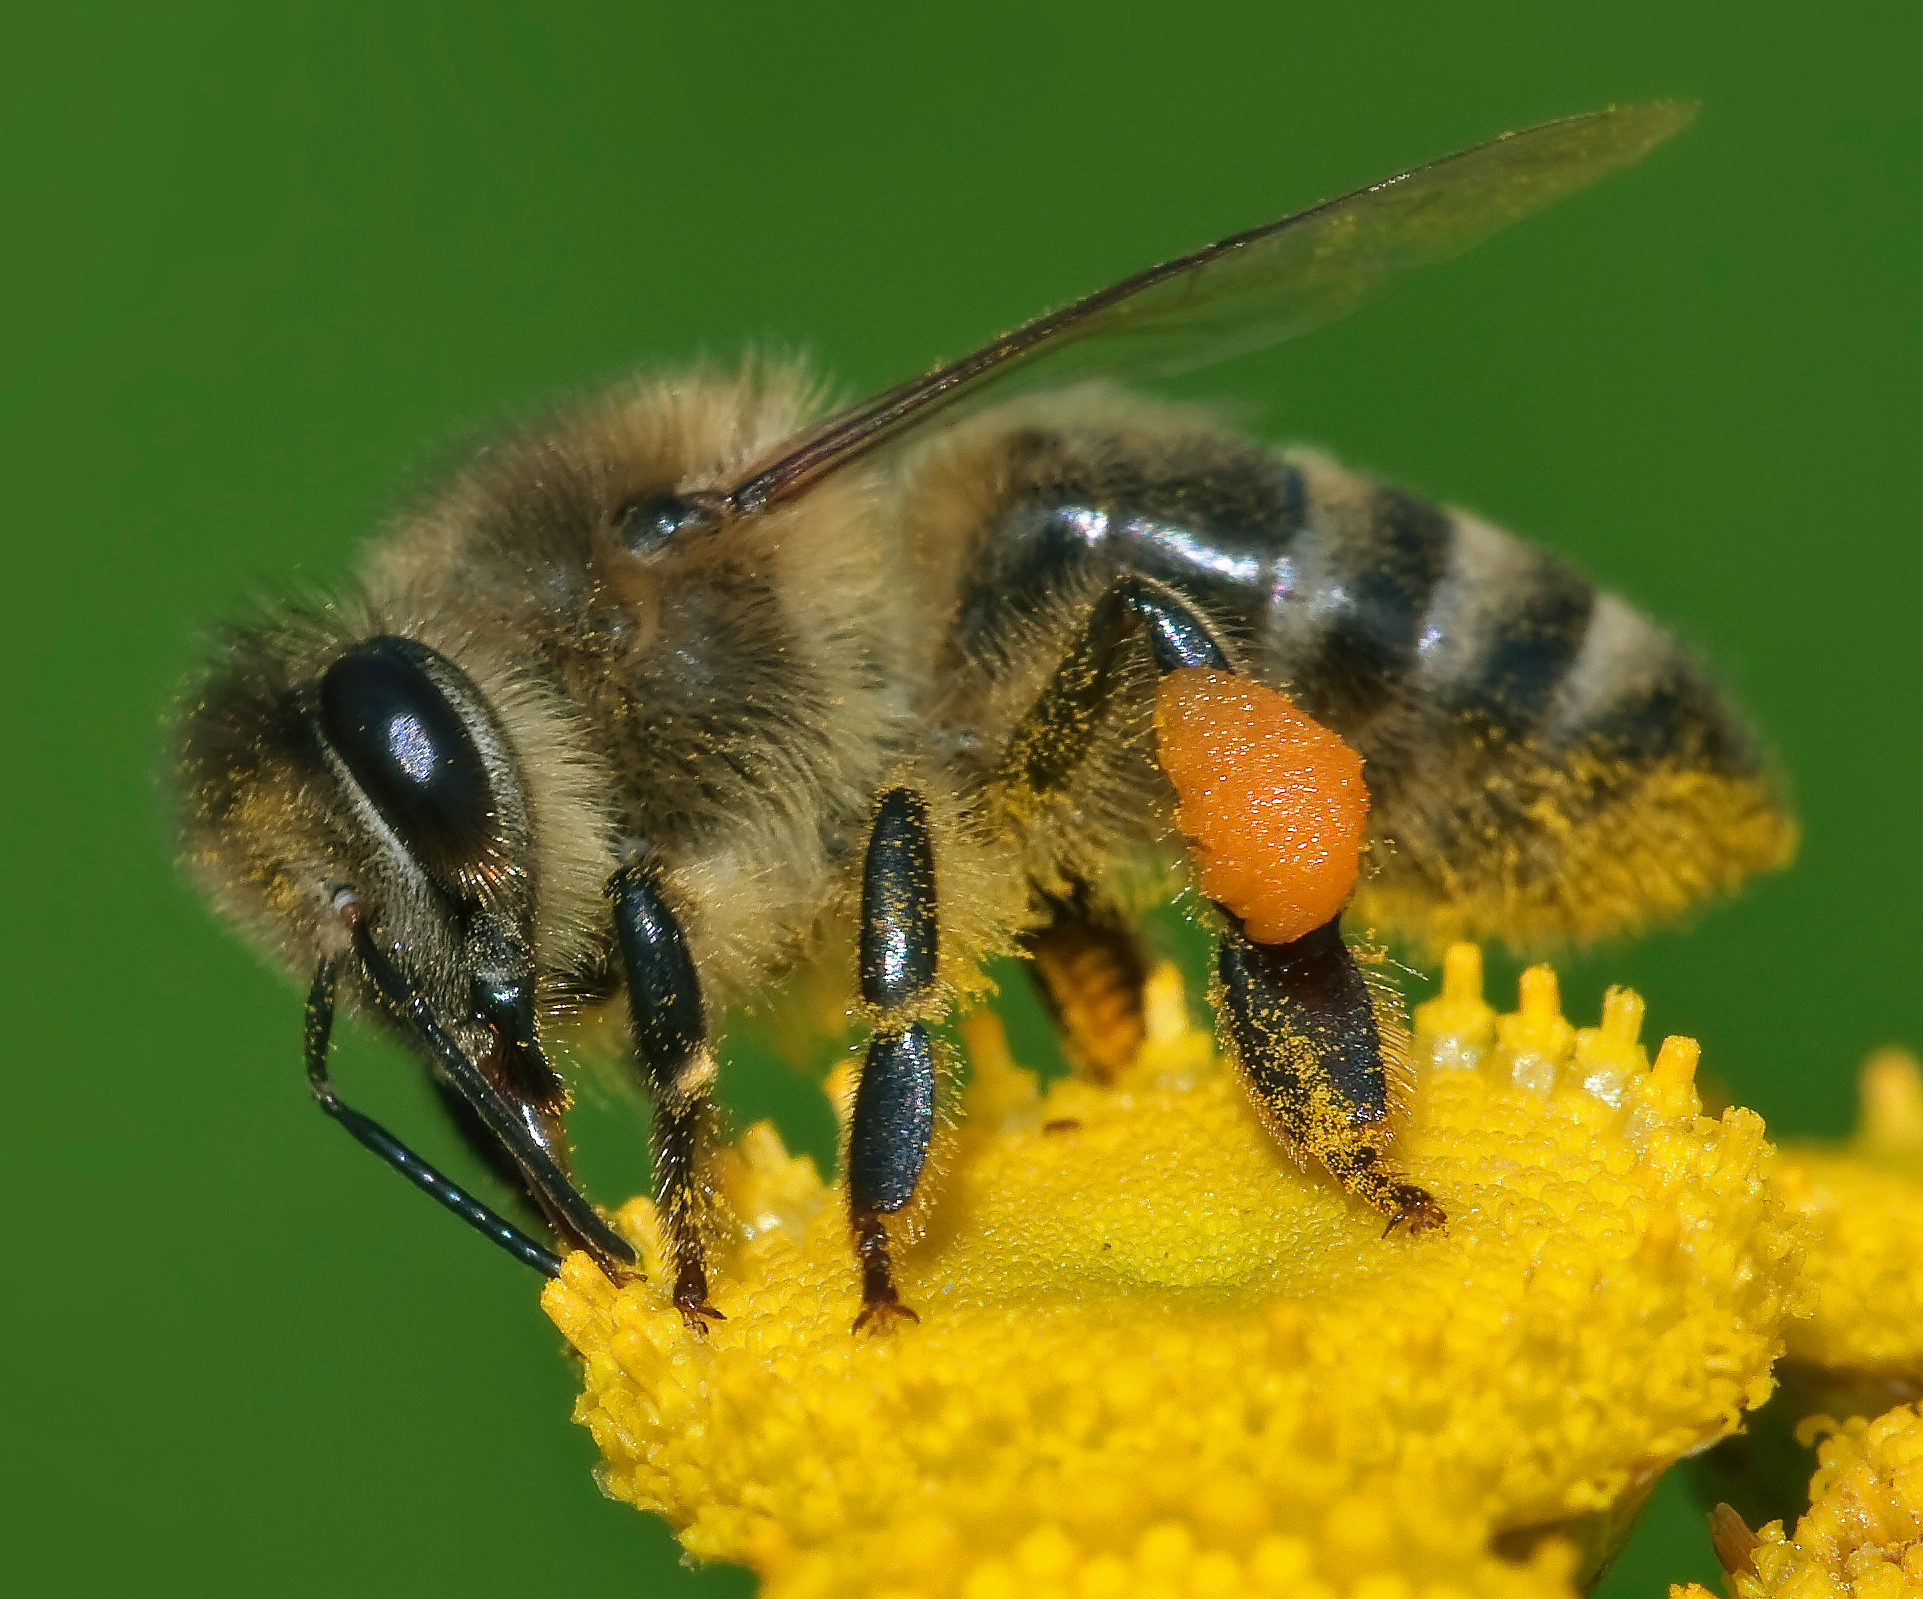

In [6]:
#텐서를 GPU에 적재
points_gpu = torch.tensor([[4.0,1.0],[5.0,3.0],[2.0,1.0]], device='cuda')

#cpu에 만들어진 텐서를 to 메소드로 gpu로 옮기기
points_gpu = points.to(device='cuda')

#gpu 여러개일시 적재법
poitns_gpu = points.to(device='cuda:0') # points.cuda() 와 같이 작성가능

#gpu에서 실행하는 곱셈
points_gpu = 2 * points.to(device='cuda:0')

#넘파이 호환
#텐서를 넘파이로 변환
p = torch.ones(3,4)
p_np = p.numpy()
p_np

#넘파이를 텐서로 변환
p = torch.from_numpy(p_np)
p

#텐서 저장
torch.save(p, './ourp.t')
#텐서 불러오기
p = torch.load('./ourp.t')
p

#호환성이 중요하다면 저장시 HDF5 포맷으로 저장
import h5py

# f = h5py.File('./ourp','w')
# dset = f.create_dataset('coords',data=p.numpy())
# f.close

from PIL import Image
a = Image.open("./bee.jpg")
a


In [12]:
import imageio

img_arr = imageio.imread('./bee.jpg')
img_arr.shape

ModuleNotFoundError: No module named 'imageio'